# 🔹 1. **Elbow Method**

* Idea: Look at the **inertia (SSE – Sum of Squared Errors / Within-Cluster Sum of Squares)** as a function of $k$.
* As $k$ increases, inertia decreases (clusters fit better).
* But after some point, the improvement slows down → forms an **elbow**.

👉 That "elbow point" is a good choice for $k$.

**Cost function (SSE):**

$$
J(k) = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

---

# 🔹 2. **Silhouette Score**

* Measures **how well-separated** the clusters are.
* Value ranges from **-1 to 1**:

  * Close to **1** → well-clustered (points are far from other clusters).
  * Around **0** → overlapping clusters.
  * Negative → points may be in the wrong cluster.

**Formula:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $a(i)$: avg. distance of point $i$ to its cluster
* $b(i)$: avg. distance of point $i$ to nearest other cluster

👉 The **best $k$** maximizes the average silhouette score.

---

# 🔹 3. **Gap Statistic**

* Compares clustering result to a **random uniform distribution** of points.
* If clustering gives much lower SSE than random, it's a good $k$.

---

# 🔹 4. **Calinski-Harabasz Index (Variance Ratio Criterion)**

* Ratio of **between-cluster variance** to **within-cluster variance**.
* Higher value = better-defined clusters.

---

# 🔹 5. **Davies–Bouldin Index**

* Measures **similarity between clusters** (how close they are).
* Lower value = better clustering.

---

# 🔹 Rule of Thumb

* Start with **Elbow Method** for intuition.
* Then confirm with **Silhouette Score** or **Gap Statistic**.
* For high-dimensional data, prefer **Silhouette** or **DB Index** since elbow can be misleading.

---

👉 Example workflow in practice:

1. Plot **Elbow curve** (SSE vs $k$) → see candidate values.
2. Compute **Silhouette score** for those $k$.
3. Pick the one that balances **compactness + separation**.



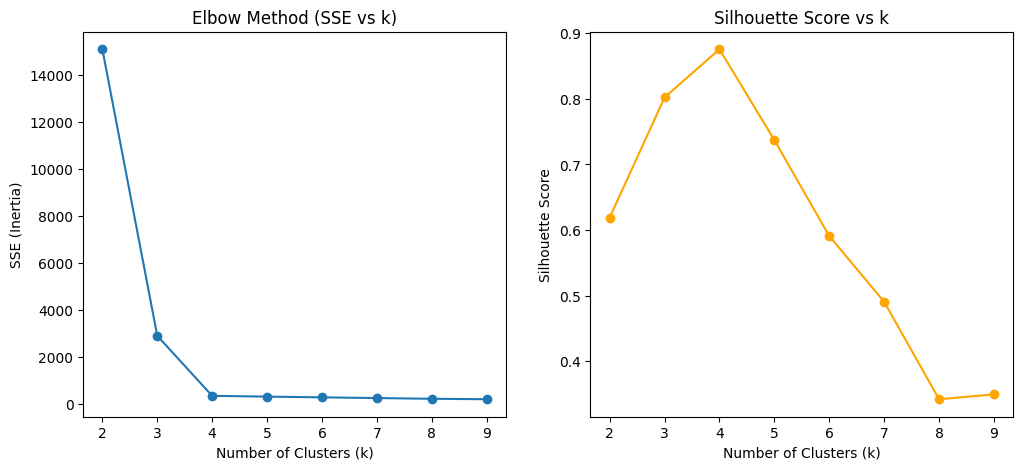

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Store SSE (inertia) and silhouette scores
sse = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method (SSE vs k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.show()


Average Silhouette Score: 0.7911042588289479


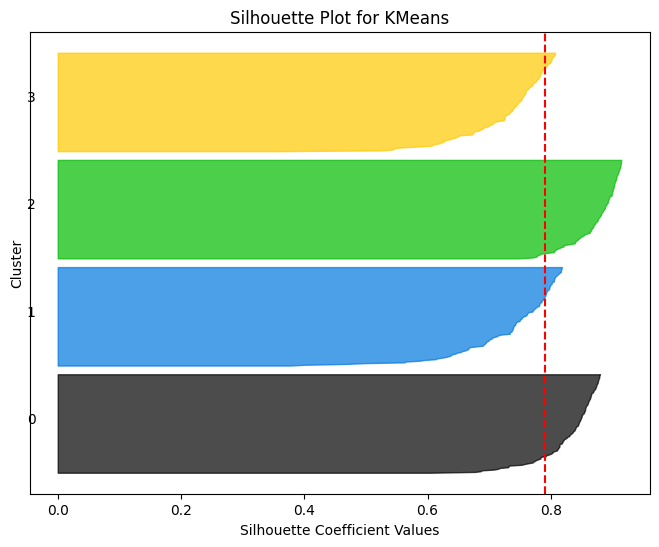

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# 1. Generate sample data
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# 2. Apply KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Compute silhouette scores
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

print("Average Silhouette Score:", silhouette_avg)

# 4. Plot Silhouette Plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(k):
    # Aggregate silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label clusters in the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # space between clusters

ax.set_title("Silhouette Plot for KMeans")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()
